
# Support Vector Machine

## Maximum margin separating hyperplane

This lab session will be based on a dataset **generated** using data generation utility of the datasets module of scikit-learn.

### Generating a dataset using `make_blobs`
`make_blobs` can create multiclass datasets by allocating each class one or more normally-distributed clusters of points.

The code given below generates a dataset containing 50 examples, 2 features, and 2 classes. 


In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, n_features=2, centers=2)

In [2]:
X.shape

(50, 2)

In [3]:
y.shape

(50,)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Train the support vector classifier `SVC`

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)

SVC(kernel='linear')

### Predict the output for test data 

In [6]:
y_pred = svc.predict(X_test)
print('Accuracy = %0.4f'%np.mean(y_pred == y_test))

Accuracy = 1.0000


## Visualize the separating hyperplane

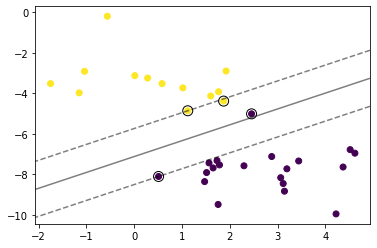

In [7]:
# plot scatter diagram of the features data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
# plot the decision function
ax = plt.gca() # get current Axes object
xlim = ax.get_xlim()     # get X-axis view limits of the axes
ylim = ax.get_ylim()     # get Y-axis view limits of the axes

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Evaluate the decision function on grid
Z = svc.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, levels=[-1, 0, 1], alpha=0.5, colors="k", linestyles=["--", "-", "--"]
)
ax.scatter(
    svc.support_vectors_[:, 0],
    svc.support_vectors_[:, 1],
    s=100,linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

In [8]:
svc.decision_function(X_test)

array([ 3.90556962,  3.9699024 , -1.68360277,  3.4756835 ,  4.08319184,
        3.75934217,  2.94663846,  2.98522347,  2.84271393,  3.5510476 ,
       -2.32903312, -1.32611347, -1.46655302,  1.99898635,  3.80564686,
       -1.37068357,  4.11168169])

In [9]:
svc.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [10]:
svc.support_vectors_

array([[ 2.45465012, -5.00683137],
       [ 0.50987054, -8.10005249],
       [ 1.12026482, -4.85414353],
       [ 1.87065589, -4.3774226 ]])

In [11]:
svc.decision_function(svc.support_vectors_)

array([ 0.13378717, -0.99999794,  1.00000009,  0.91945529])

### Home Work

Use the same dataset with (i) LDA based classifier and (ii) Logistic regression classifier and compare the performance of the thee classifiers.